<h1>Problem Statement</h1>
<p>Building a model to predict whether a customer will subscribe to a term deposit<p>

<h2>The following Book contains</h2>

<ol style="font-size: 15px">
    <li>Basic Dataset information</li>
    <li>Data Cleaning : Treating missing ,Outlier Treatment :Winsorization and capping of outlier ,Conversion of cartegorical data to numerical(One Hot Encoding) </li>
    <li>EDA with explanation of every chart </li>
    <li>Balancing Dataset : Oversampling through SMOTE </li>
    <li>Train Test Split</li>
    <li>Traing model (algorithms): Logestic Regression,KNN,SVM,Decicion Tree,Random Forest with classification report</li>
    <li>Comparision of Models through (Confusion Matrix) Precision, Recall ,F1 Score and accuracy is taken in account</li>
    <li>10 Questions that needed to be answered</li>
</ol>

<h2>Loading Library</h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<h2>Loading Dataset</h2>

In [29]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets


In [30]:
frames=[X,y]
df=pd.concat(frames,axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [31]:
org_df=df

<h2>Basic info of Dataset</h2>

In [7]:
df.shape

(45211, 17)

In [8]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
22039,43,technician,divorced,tertiary,no,1088,no,no,cellular,20,aug,341,3,-1,0,NaN,no
20590,60,admin.,married,secondary,no,711,no,no,cellular,12,aug,355,4,-1,0,NaN,no
44999,63,management,married,tertiary,no,0,no,no,cellular,12,oct,130,2,182,6,failure,no
7661,53,technician,married,secondary,no,2647,yes,no,NaN,30,may,121,1,-1,0,NaN,no
40945,61,management,married,secondary,no,1471,no,no,cellular,12,aug,331,2,-1,0,NaN,no


In [9]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<h2>Data Cleansing</h2>

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [12]:
df.isna().sum()*100/len(df)

age             0.000000
job             0.637013
marital         0.000000
education       4.107407
default         0.000000
balance         0.000000
housing         0.000000
loan            0.000000
contact        28.798301
day_of_week     0.000000
month           0.000000
duration        0.000000
campaign        0.000000
pdays           0.000000
previous        0.000000
poutcome       81.747805
y               0.000000
dtype: float64

<h2>Treating missing data in column </h2>
<ol>
    <li>job: mode</li>
    <li>education: mode</li>
    <li>contact:mode</li>
    <li>poutcome:drop column</li>
</ol>


In [13]:
df["job"].fillna(df["job"].mode()[0],inplace=True)

In [14]:
df["education"]=df["education"].fillna(df["education"].mode()[0])

In [15]:
df["contact"].fillna(df["contact"].mode()[0],inplace=True)

In [16]:
df["poutcome"].fillna(df["poutcome"].mode()[0],inplace=True)

In [17]:
df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [18]:
#checking duplicate data
df.duplicated().sum()

0

<h1>Using percentiles for capping outliers</h1>

In [18]:
#making of categorical and numerical df
num=["age","balance","day_of_week","duration","campaign","pdays","previous"]
df_num=df[["age","balance","day_of_week","duration","campaign","pdays","previous"]].copy()
df_cat=df.drop(columns=num)


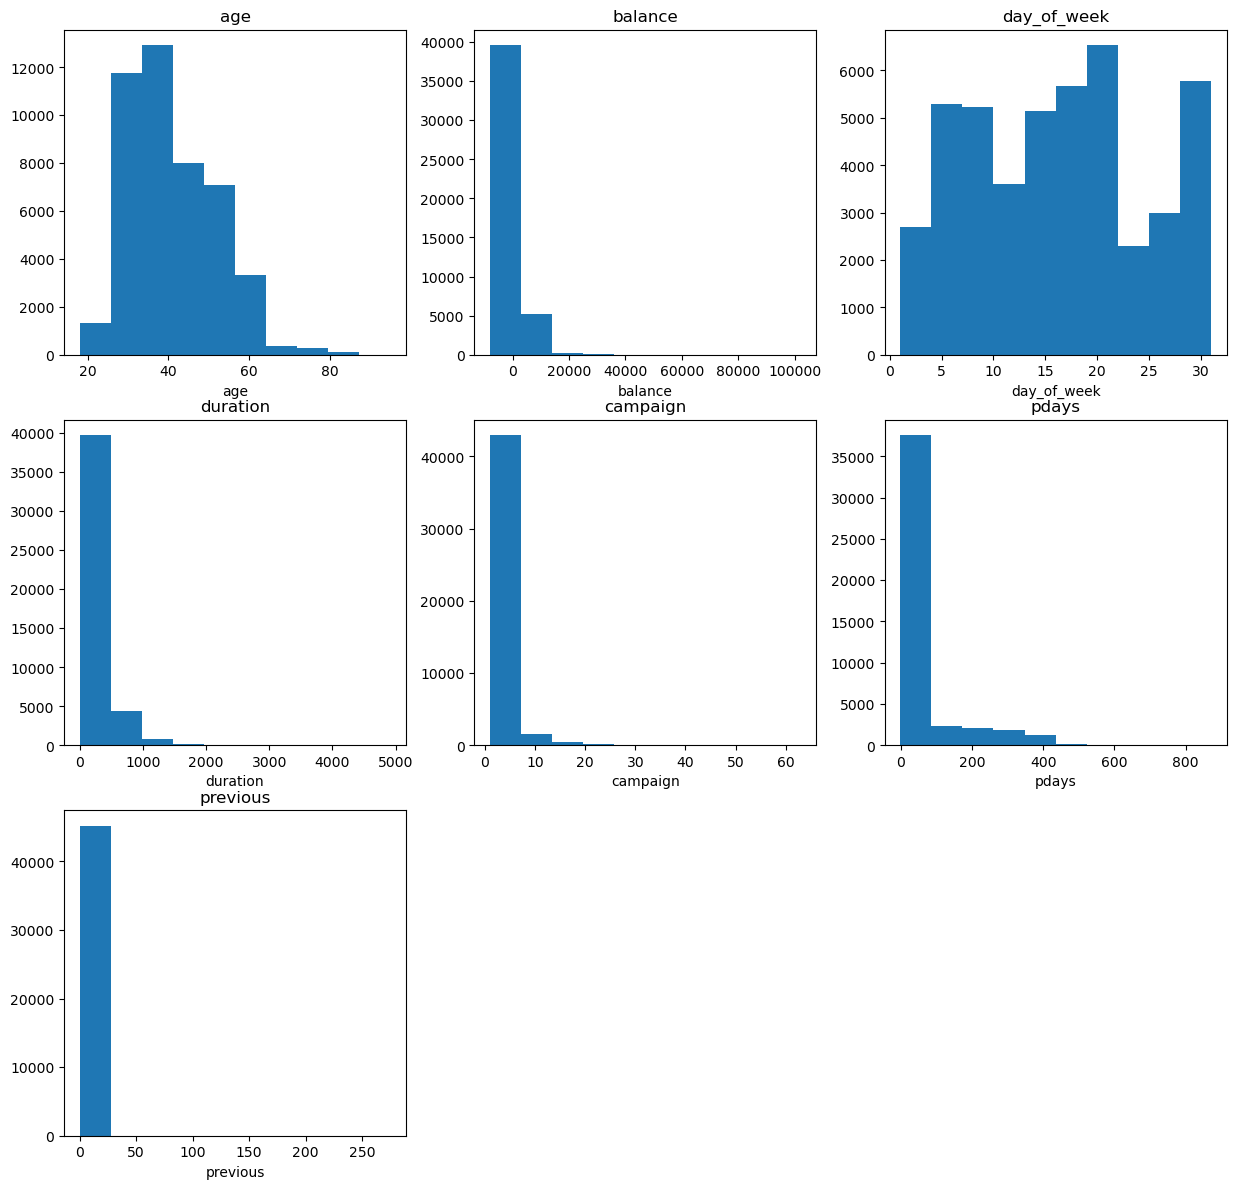

In [19]:
#histplot
plt.figure(figsize=(15,60))
plotnumber=1
for i in df_num:
    ax=plt.subplot(12,3,plotnumber)
    plt.hist(i,data=df_num)
    plt.xlabel(i)
    plt.title(i)
    plotnumber+=1

In [122]:
from scipy.stats.mstats import winsorize
def percentile_capping (df, cols, from_low_end, from_high_end):
  for i in cols:
    winsorize(a=df[i], limits=(from_low_end, from_high_end),inplace=True)

In [123]:
win_list=["balance","duration","campaign","pdays","previous"]
percentile_capping(df,win_list,0.01,0.1)

<h1>Treating categorical features (Transformation)</h1>

In [124]:
#how many unique values does categorical feature and independent feature have
for i in df_cat:
    print(i+": "+str(df[i].unique().shape[0]))


job: 11
marital: 3
education: 3
default: 2
housing: 2
loan: 2
contact: 2
month: 12
poutcome: 3
y: 2


In [125]:
from sklearn.preprocessing import LabelEncoder
le_job= LabelEncoder()
le_month= LabelEncoder()

df["job"]=le_job.fit_transform(df["job"])
df["month"]=le_month.fit_transform(df["month"])

In [126]:
#making of x data frame
x=pd.get_dummies(df.drop(columns=["y"]),drop_first=True)

In [127]:
#making of y
# 1=subscribed and 0 =not subscribed
df["y"].replace(('yes', 'no'), (1, 0), inplace=True)
y=df["y"]

<h1>Exploratory Data Analysis</h1>

<h2>1. Is job relevent?</h2>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'retired'),
  Text(5, 0, 'admin.'),
  Text(6, 0, 'services'),
  Text(7, 0, 'self-employed'),
  Text(8, 0, 'unemployed'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'student')])

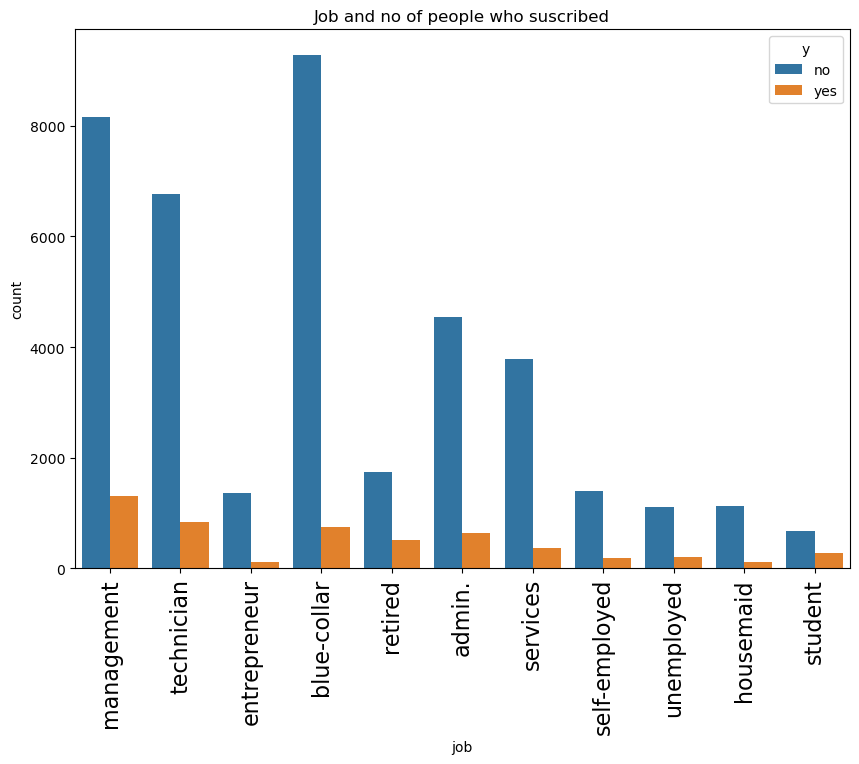

In [21]:
plt.figure(figsize=(10, 7))
plt.title("Job and no of people who suscribed")
plt.legend(title="no of yes and no",labels=["no","yes"])
sns.countplot(x="job", data=df, hue='y')
plt.xticks(size=16, rotation=90)

<li style="font-size: 20px">We can see that people from<b> management ,technician and blue collar workers</b> have subscribed the most</li>

<h2>How yearly balance infulences Subscription</h2>

Text(0.5, 0, 'subscribers')

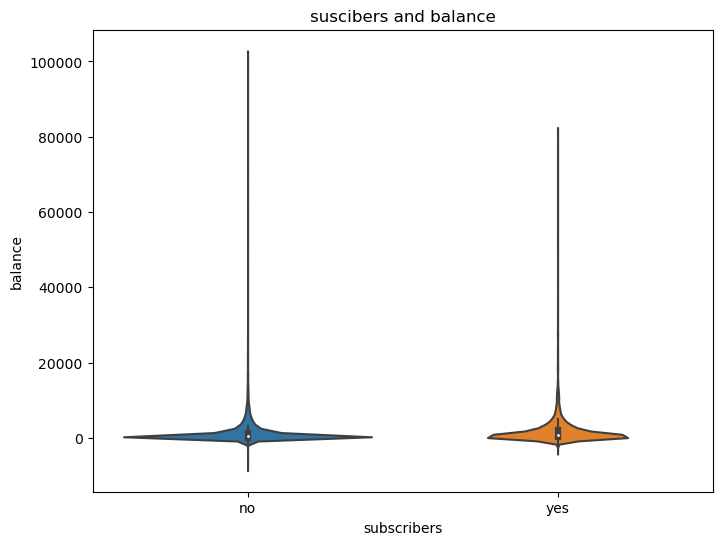

In [37]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df,x="y",y="balance").set(title="suscibers and balance")
plt.xlabel("subscribers")

<li style="font-size: 20px">people having balance between 50 to 15000 euros tend to subscribe</li>

<h2>In which age group do people with or without loan tend to subscibe</h2>

Text(0.5, 28.999999999999986, 'subscribers')

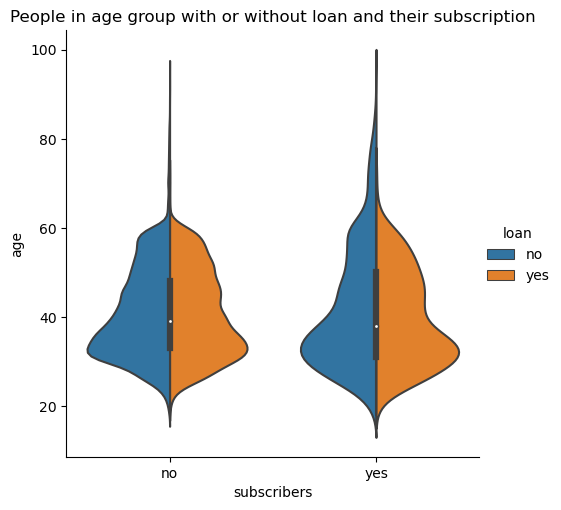

In [22]:
sns.catplot(data=df, x="y", y="age",kind="violin",hue="loan",split=True,color_palette="GnBu").set(title="People in age group with or without loan and their subscription")
plt.xlabel("subscribers")

<li style="font-size: 20px">People in <b>age: 20 to 40</b> having loan tend to subscribe most</li>

<h2>In which month we had most subscribers</h2>

[Text(0.5, 1.0, 'People that said no over the year')]

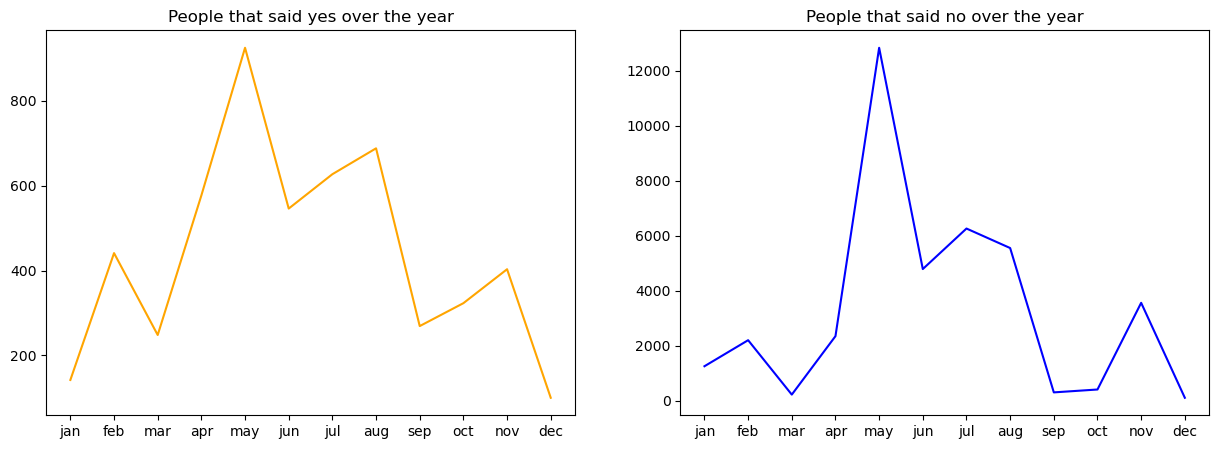

In [23]:
df_month=pd.DataFrame(df.groupby(["month"])["y"].value_counts())
columns=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

yes_list=[]
no_list=[]

for i in columns:
    df_month["y"][i]["yes"]
    yes_list.append(df_month["y"][i]["yes"])
    no_list.append(df_month["y"][i]["no"])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(ax=axes[0],x=columns,y=yes_list,color="orange").set(title="People that said yes over the year")
sns.lineplot(ax=axes[1],x=columns,y=no_list,color="blue").set(title="People that said no over the year")




<ul style="font-size: 15px">
    <li>May</li>
    <li>August </li>
    <li>june</li>
</ul>

<h2>Observation on Categorical columns</h2>

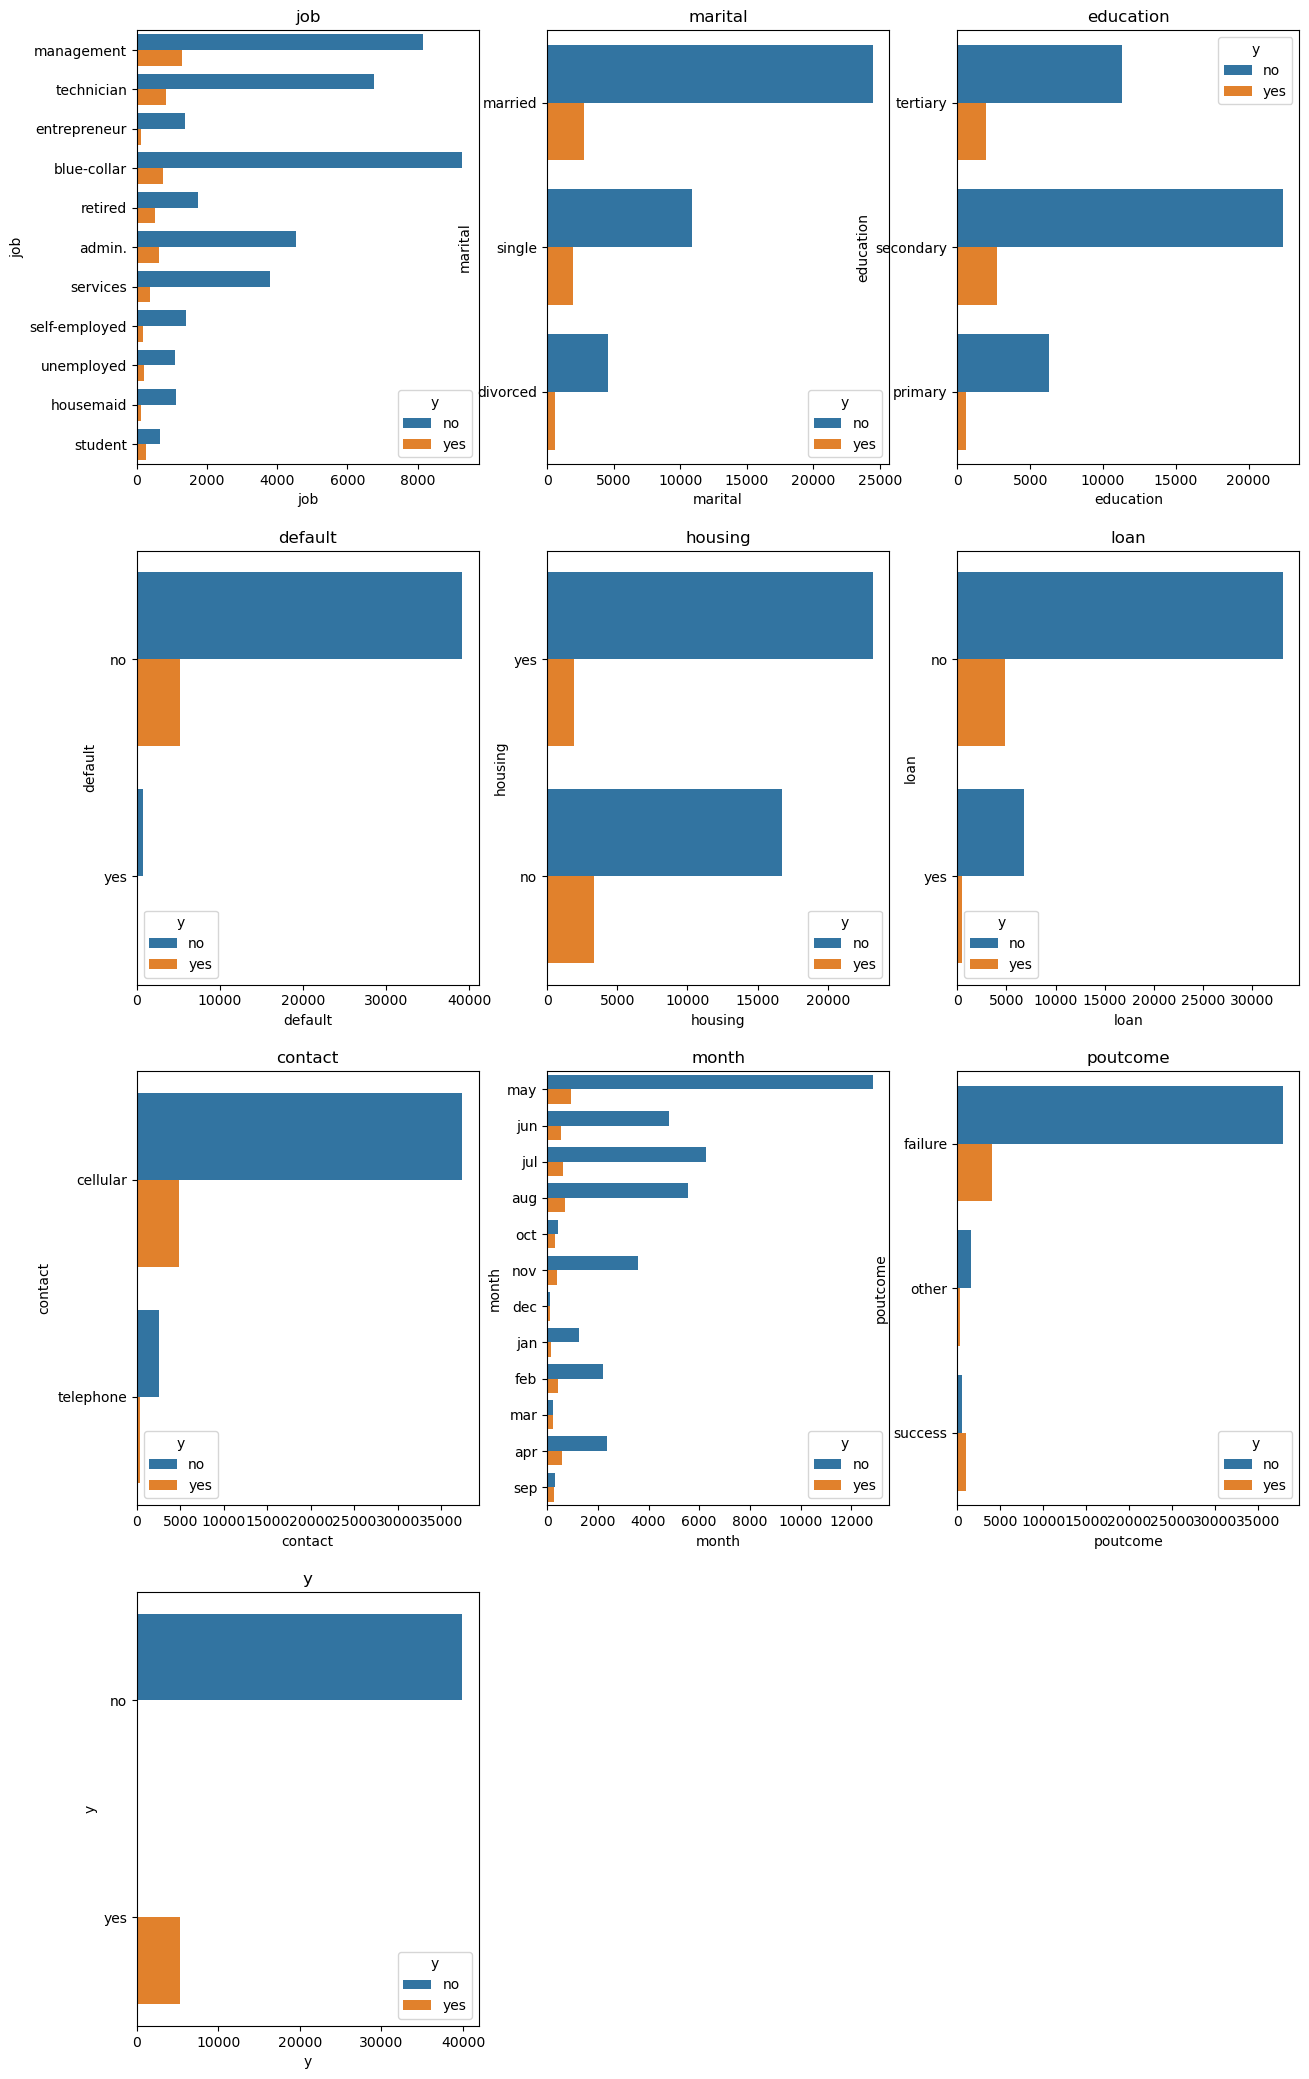

In [24]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber=1
for i in df_cat:
    ax=plt.subplot (12,3,plotnumber)
    sns.countplot(y=i, data=df_cat,hue="y")
    plt.xlabel(i)
    plt.title(i)
    plotnumber+=1


<ul style="font-size: 15px">
    <li>Target Audience:Technician,management,peopel with blue-collar and retired people</li>
    <li>Mosty married and single people have subscribed </li>
    <li>People in secondary education were contacted most and have subscribed most ,but people with tertiary education were contacted comparetively less but subscribed more  </li>
    <li>Intrestingly ,people who have subscribed do not have credit in default </li>
    <li>People who have no housing loan tend to subscribe  more</li>
    <li>People who have no loan tend to subscribe more</li>
    <li>Most people who subscribed were contacted through cellular phone </li>
    <li>In May,June and August people have subscribed most</li>
</ul>

([<matplotlib.patches.Wedge at 0x239dd0ffa30>,
 [Text(-0.19197472005325109, 1.0831185100719478, 'yes'),
  Text(0.1919747200532507, -1.0831185100719478, 'no')],
 [Text(-0.10471348366540967, 0.5907919145846987, '55.58'),
  Text(0.10471348366540946, -0.5907919145846988, '44.42')])

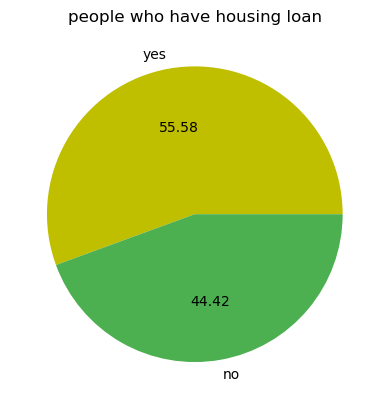

In [49]:
plt.title("people who have housing loan")
house=df["housing"].value_counts()
labels = ["yes", "no"]
colors = [ "y", "#4CAF50"]
plt.pie(house,labels=labels,colors=colors,autopct='%.2f')

([<matplotlib.patches.Wedge at 0x239dd4bf3a0>,
 [Text(-0.963560081603819, 0.5306147087479217, 'yes'),
  Text(0.9635601312835493, -0.5306146185329135, 'no')],
 [Text(-0.5255782263293558, 0.28942620477159364, '83.98'),
  Text(0.5255782534273905, -0.28942615556340734, '16.02')])

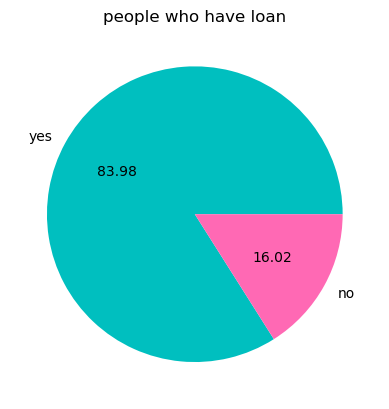

In [65]:
plt.title("people who have loan")
loan=df["loan"].value_counts()
labels = ["yes", "no"]
colors = [ "c", "hotpink"]
plt.pie(loan,labels=labels,colors=colors,autopct='%.2f')

In [56]:
df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

([<matplotlib.patches.Wedge at 0x239dd758b50>,
 [Text(-0.34626600924200074, 1.0440784696772647, 'marital'),
  Text(-0.04573369023536169, -1.099048874972108, 'single'),
  Text(1.028779331933144, -0.38937525112312166, 'divorced')],
 [Text(-0.1888723686774549, 0.5694973470966898, '60.19'),
  Text(-0.024945649219288192, -0.5994812045302407, '28.29'),
  Text(0.5611523628726239, -0.2123865006126118, '11.52')])

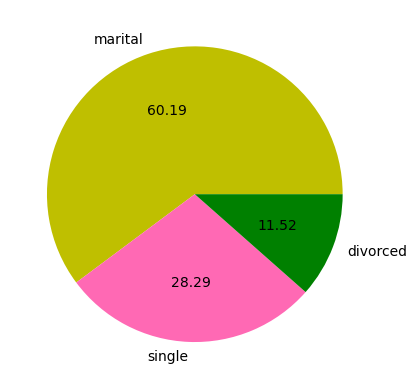

In [66]:
#plt.title("Marital Status")
marital=df["marital"].value_counts()
marital
labels = ["marital", "single","divorced"]
colors = [ "y", "hotpink","g"]
plt.pie(marital,labels=labels,colors=colors,autopct='%.2f')

<h1>Train test split</h1>

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


<h1>Checking if dataset is balanced ?</h1>

In [250]:
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

[Text(0.5, 1.0, 'Imbalanced dataset')]

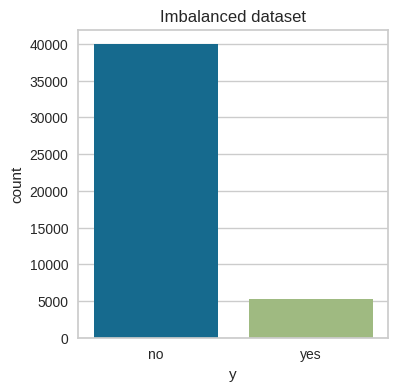

In [251]:
plt.figure(figsize=(4,4))
sns.countplot(x ='y', data = df).set(title="Imbalanced dataset")

<h1>Balancing dataset</h1>

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x_train, y_train)


[Text(0.5, 1.0, 'Balanced dataset')]

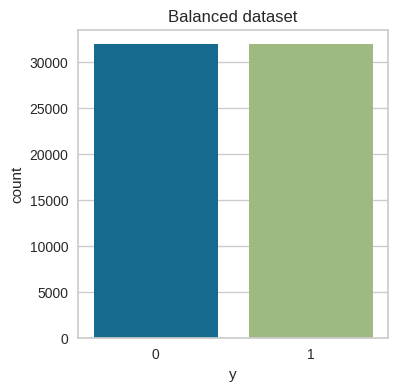

In [153]:
plt.figure(figsize=(4,4))
sns.countplot(x=y_res).set(title="Balanced dataset")

# Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_res, y_res)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [140]:
lr_pred=lr.predict(x_test)

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88      7993
           1       0.33      0.69      0.44      1050

    accuracy                           0.80      9043
   macro avg       0.64      0.75      0.66      9043
weighted avg       0.88      0.80      0.83      9043



In [167]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
lr_f1=np.round(f1_score(y_test,lr_pred,average=None)*100,2)
lr_acc=np.round(accuracy_score(y_test,lr_pred),2)

# KNN

In [121]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
st= StandardScaler()
x_train_sc= st.fit_transform(x_res)
x_test_sc= st.transform(x_test)

In [136]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3, metric='minkowski' )
knn.fit(x_train_sc, y_res)

KNeighborsClassifier(n_neighbors=3)

In [141]:
#knn prediction
knn_pred= knn.predict(x_test_sc)

In [142]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7993
           1       0.39      0.54      0.45      1050

    accuracy                           0.85      9043
   macro avg       0.66      0.72      0.68      9043
weighted avg       0.87      0.85      0.86      9043



In [168]:
knn_f1=np.round(f1_score(y_test,knn_pred,average=None)*100,2)
knn_acc=np.round(accuracy_score(y_test,knn_pred),2)

# SVM

In [145]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=0)
svm.fit(x_train_sc, y_res)

SVC(kernel='linear', random_state=0)

In [147]:
#Predicting
svm_pred= svm.predict(x_test_sc)

In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      7993
           1       0.37      0.58      0.45      1050

    accuracy                           0.84      9043
   macro avg       0.66      0.73      0.68      9043
weighted avg       0.87      0.84      0.85      9043



In [169]:
svm_f1=np.round(f1_score(y_test,svm_pred,average=None)*100,2)
svm_acc=np.round(accuracy_score(y_test,svm_pred),2)

# Decision Tree

In [150]:
from sklearn.tree import DecisionTreeClassifier
decision_tree= DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree.fit(x_res, y_res)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [151]:
decision_tree_pred= decision_tree.predict(x_test)

In [152]:
print(classification_report(y_test,decision_tree_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7993
           1       0.38      0.53      0.44      1050

    accuracy                           0.85      9043
   macro avg       0.66      0.71      0.68      9043
weighted avg       0.87      0.85      0.86      9043



In [170]:
decision_tree_f1=np.round(f1_score(y_test,decision_tree_pred,average=None)*100,2)
decision_tree_acc=np.round(accuracy_score(y_test,decision_tree_pred),2)

# Using Random Forest

In [171]:
#with balanced dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf=RandomForestClassifier(max_depth=100, random_state=1,n_estimators=100)
rf.fit(x_res,y_res)

RandomForestClassifier(max_depth=100, random_state=1)

In [172]:
rf_pred=random_balance.predict(x_test)

In [174]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7993
           1       0.47      0.57      0.51      1050

    accuracy                           0.87      9043
   macro avg       0.70      0.74      0.72      9043
weighted avg       0.89      0.87      0.88      9043



In [175]:
rf_f1=np.round(f1_score(y_test,rf_pred,average=None)*100,2)
rf_acc=np.round(accuracy_score(y_test,rf_pred),2)

# Model Comparision

In [180]:
d1 = {'Models':["Logistic Regression","KNN","SVM","Decision Tree","Random Forest"], 'F1 Score[0,1]':[lr_f1, knn_f1,svm_f1, decision_tree_f1,rf_f1],'Model_accuracy':[lr_acc,knn_acc,svm_acc,decision_tree_acc,rf_acc]}
comparision=pd.DataFrame(d1)
comparision

,Models,"F1 Score[0,1]",Model_accuracy
0,Logistic Regression,"[87.77, 44.37]",0.80
1,KNN,"[91.16, 45.29]",0.85
2,SVM,"[90.38, 45.19]",0.84
3,Decision Tree,"[91.08, 44.36]",0.85
4,Random Forest,"[92.8, 51.5]",0.87


<h1>10 Questions to be solved</h1>

<h2>1. What is the distribution of the customer ages?</h2>

Text(0, 0.5, 'count')

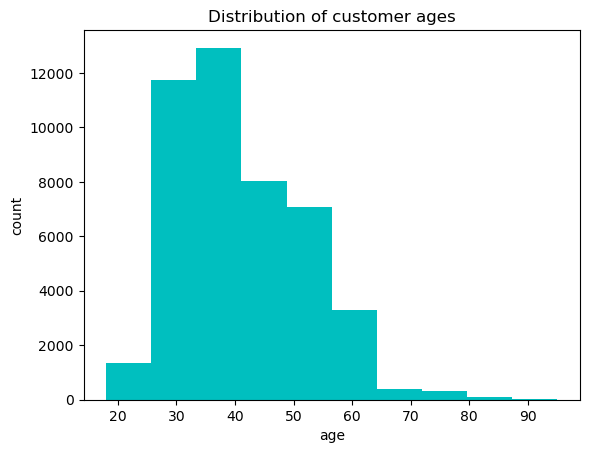

In [23]:
plt.title("Distribution of customer ages")
plt.hist(X["age"],color="c")
plt.xlabel("age")
plt.ylabel("count")

<h2>2. What is the relationship between customer age and subscription?
</h2>

Text(0.5, 28.999999999999986, 'subscribers')

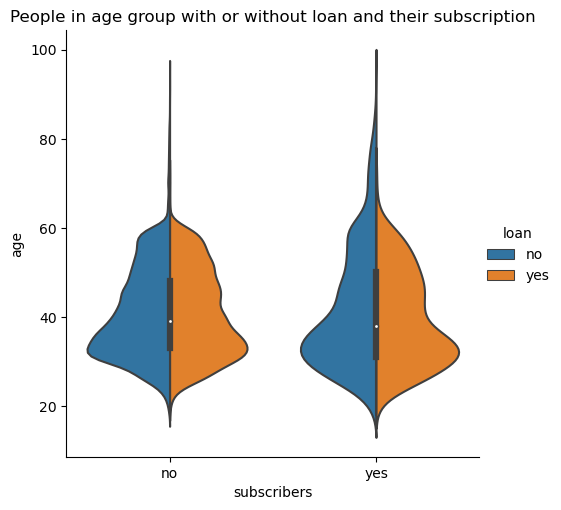

In [25]:
sns.catplot(data=df, x="y", y="age",kind="violin",hue="loan",split=True,color_palette="GnBu").set(title="People in age group with or without loan and their subscription")
plt.xlabel("subscribers")

<li style="font-size: 20px">People in <b>age: 20 to 40</b> having loan tend to subscribe most</li>

<h2>3.  factors that are correlated with subscription?</h2>

C:\Users\user\AppData\Local\Temp\ipykernel_3508\3870688284.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

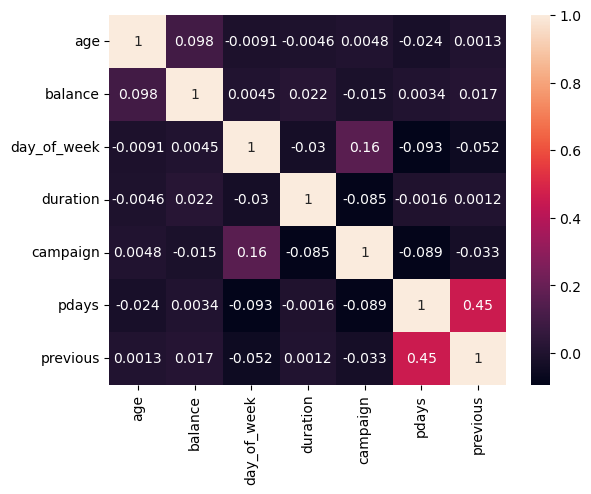

In [35]:
corr = df.corr()
sns.heatmap(corr, annot=True)

<li style="font-size: 15px">Previous,pdays,day_of_week,duration and month are correlated to subscription </li>


<h2>4. What is the accuracy of the logistic regression model?</h2>

<li style="font-size: 20px">The model that I have chosen finally is <b>Random Forest and its Accuracy is 87%</b></li>


<h2>5.What are the most important features for the logistic regression model?
</h2>

In [105]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini')

# Fit the decision tree classifier
clf = clf.fit(x_train, y_train)


In [106]:
feature_importances = clf.feature_importances_

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


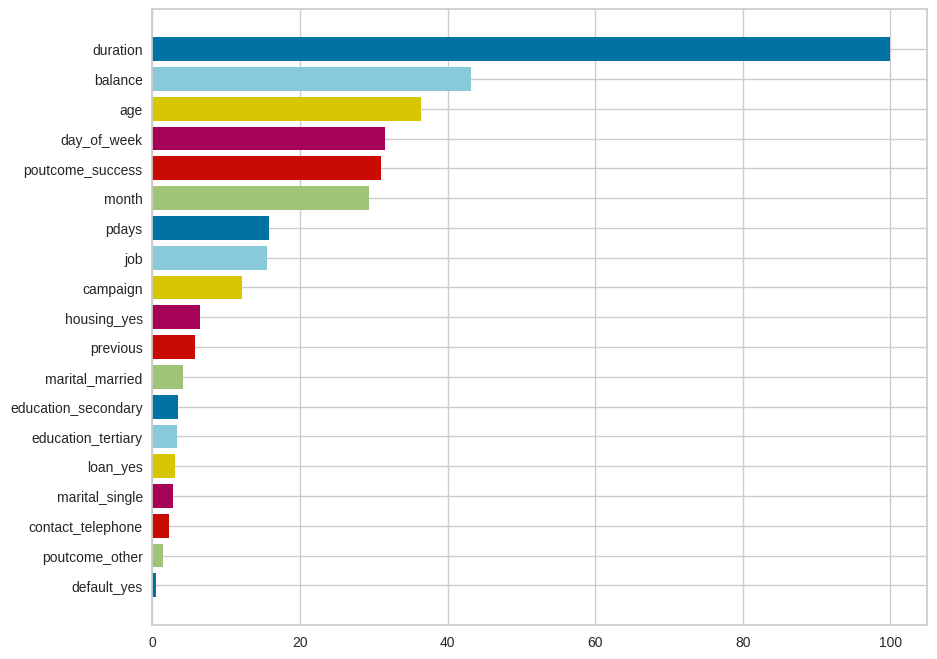

In [107]:
from yellowbrick.model_selection import FeatureImportances
fig , ax = plt.subplots(figsize=(10,8))
tree_viz = FeatureImportances(clf)
tree_viz.fit(x_train,y_train)
plt.show()

  The most important features are:
<ol style="font-size: 15px">
    <li>Duration</li>
    <li>Balance </li>
    <li>age</li>
    <li>Day of week</li>
    <li>Month</li>
</ol>

<h2>6. What is the precision of the logistic regression model?</h2>

<li style="font-size: 20px">Precision of Random forest <b>0: 94% , 1: 47%</b></li>


<h2>7. What is the recall of the logistic regression model?
</h2>

<li style="font-size: 20px">Recall of Random forest <b>0: 91% , 1: 57%</b></li>


<h2>8. What is the f1-score of the logistic regression model?
</h2>

<li style="font-size: 20px">F1 Score of Random forest <b>0: 92.8% , 1: 51.5%</b></li>


<h2>9. How can you improve the performance of the logistic regression model?</h2>

<li style="font-size: 15px">Tuning parameters of random forest</li>
<li style="font-size: 15px">Lowering the number of estimators </li>
<li style="font-size: 15px">mention maximum number of features to be included at each node split</li>
<li style="font-size: 15px">Try to reduce number of features through feature selection</li>

<h2>10. What are the limitations of the logistic regression model?</h2>

<li style="font-size: 15px">Will require one hot encoding or lable encoding in pipeline</li>
<li style="font-size: 15px">: The training time of Random Forest can be longer than other algorithms. Especially if the number of trees and the depth of the trees are high. </li>
<li style="font-size: 15px">Requires more resources</li>
